# Basic image processing in Python 3

First of all we need to import misc module from scipy which has the builtin funcitons for opening images (now rplaced with imageio). 
Numpy is a numerical computing and linear algebra library which we use to process digital images as matrices. Matplotlib provies several methods for ploting which we will use for displaying images. 


In [1]:
from imageio import imread
import numpy as np
from matplotlib.pyplot import imshow, plot
import matplotlib.pyplot as plt
from scipy import ndimage

Image 1 shape: (263, 301, 3)


C:\Users\Daats\AppData\Local\Temp\ipykernel_10288\4096279918.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_data = [imread(path) for path in image_paths]


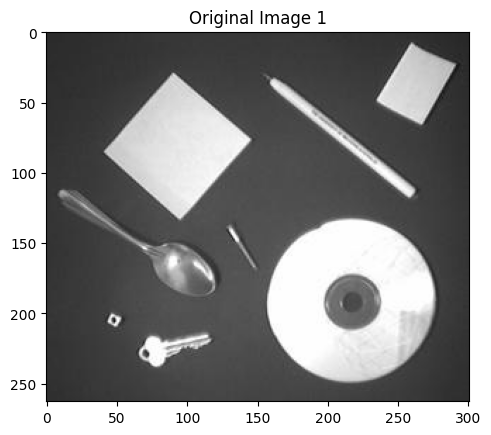

Image 2 shape: (183, 275, 3)


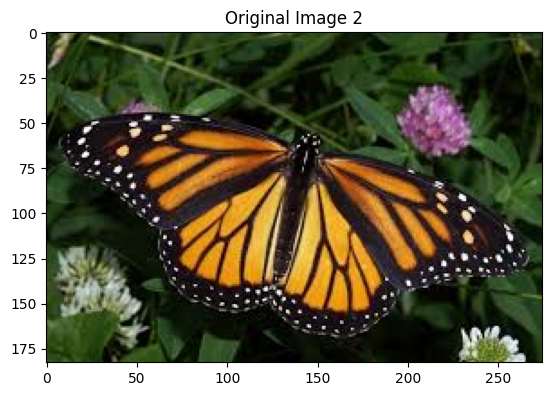

Image 3 shape: (225, 225, 3)


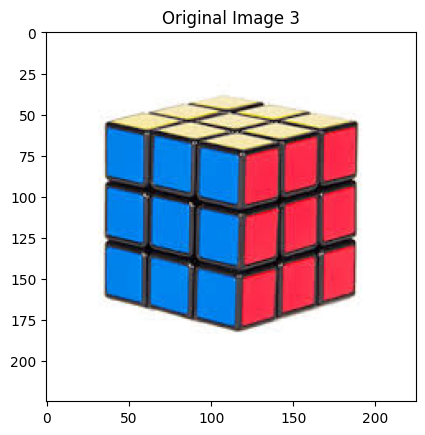

In [2]:
# Enable inline plotting
%matplotlib inline

# Load images using a list and loop
image_paths = ['pic1.jpeg', 'pic2.jpeg', 'pic3.jpeg']
image_data = [imread(path) for path in image_paths]

# Display loaded images
for idx, img in enumerate(image_data):
    print(f"Image {idx+1} shape: {img.shape}")
    imshow(img)
    plt.title(f'Original Image {idx+1}')
    plt.show()

In [3]:
# Check types and pixel samples
for i, pic in enumerate(image_data):
    print(f"Image {i+1}: Type={type(pic)}, Shape={pic.shape}")
    print("Top-left pixel:", pic[0][0], "Type:", type(pic[0][0]))

Image 1: Type=<class 'numpy.ndarray'>, Shape=(263, 301, 3)
Top-left pixel: [43 43 43] Type: <class 'numpy.ndarray'>
Image 2: Type=<class 'numpy.ndarray'>, Shape=(183, 275, 3)
Top-left pixel: [29 54 12] Type: <class 'numpy.ndarray'>
Image 3: Type=<class 'numpy.ndarray'>, Shape=(225, 225, 3)
Top-left pixel: [255 255 255] Type: <class 'numpy.ndarray'>


## RGB to Grayscale Conversion

There are many ways to convert RGB to Grayscale. Here’s we’ll do two of those, a simple Average and a Weighted Average.
Simple Average

This formula is very simple:
$$ i = \frac{r + g + b}{3} $$

In [4]:
def average(pixel):
    return (pixel[0] + pixel[1] + pixel[2]) / 3

#OR, even more simple, use numpy's average
#np.average(pixel)

In [5]:
# Convert RGB to Grayscale using simple average
def to_grayscale_average(rgb_pixel):
    return np.mean(rgb_pixel)

grayscale_images = []
for img in image_data:
    gray = np.zeros((img.shape[0], img.shape[1]))
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            gray[r][c] = to_grayscale_average(img[r][c])
    grayscale_images.append(gray)

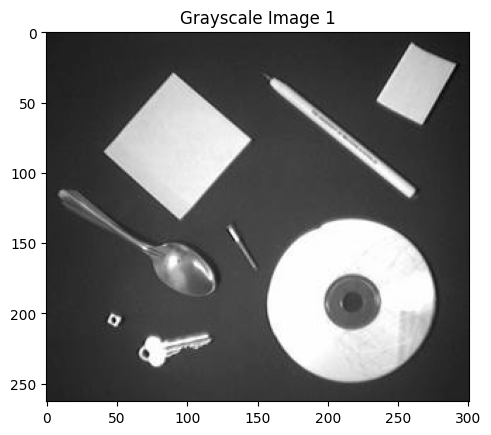

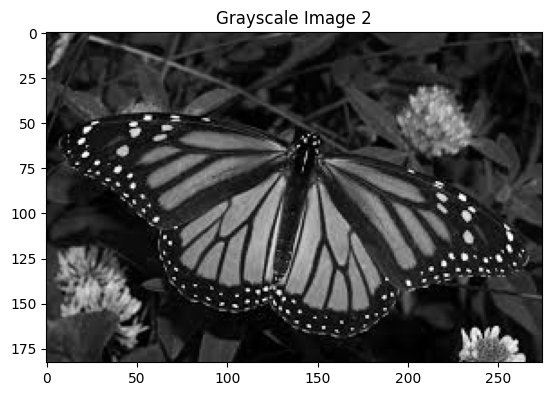

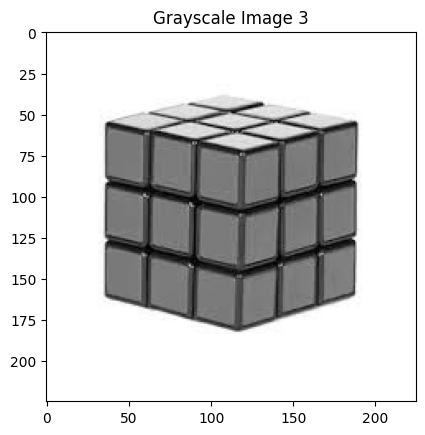

In [6]:
# Show grayscale images
for i, gray_img in enumerate(grayscale_images):
    imshow(gray_img, cmap='gray')
    plt.title(f'Grayscale Image {i+1}')
    plt.show()

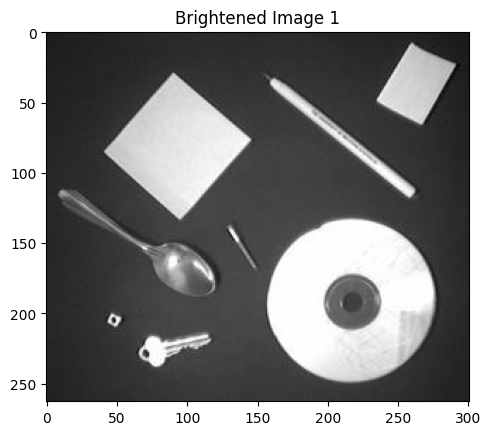

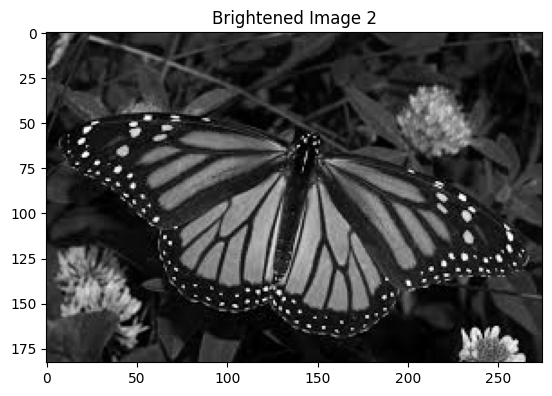

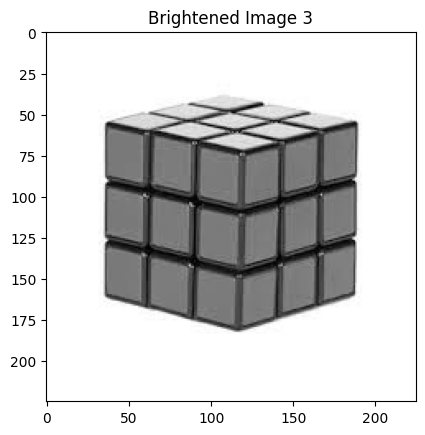

In [7]:
# Brighten images by increasing intensity
bright_images = [g * 2.25 for g in grayscale_images]

for i, bright in enumerate(bright_images):
    imshow(bright, cmap='gray')
    plt.title(f'Brightened Image {i+1}')
    plt.show()


Using this function to convert an image

# performing image inversion

$$ S(x,y) = 256 - R(x,y) $$

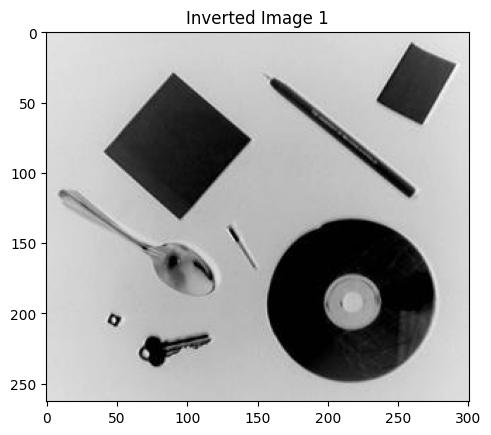

Image 1 original vs inverted top-left pixel:
Original: 43.0 -> Inverted: 212.0


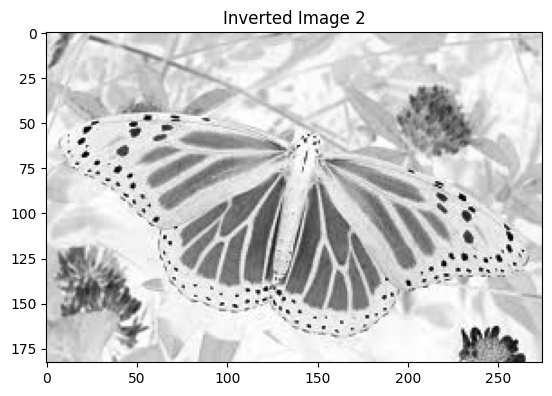

Image 2 original vs inverted top-left pixel:
Original: 31.666666666666668 -> Inverted: 223.33333333333334


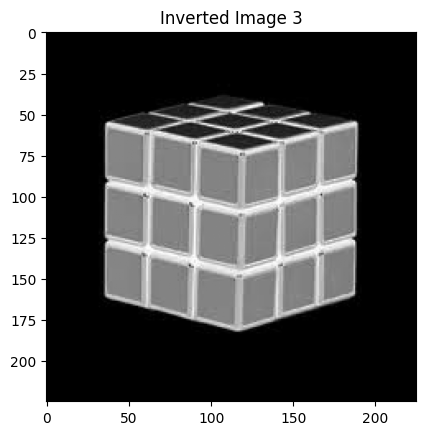

Image 3 original vs inverted top-left pixel:
Original: 255.0 -> Inverted: 0.0


In [8]:
# Invert grayscale images
inverted_images = [255 - g for g in grayscale_images]

for i, neg in enumerate(inverted_images):
    imshow(neg, cmap='gray')
    plt.title(f'Inverted Image {i+1}')
    plt.show()
    print(f"Image {i+1} original vs inverted top-left pixel:")
    print("Original:", grayscale_images[i][0][0], "-> Inverted:", neg[0][0])

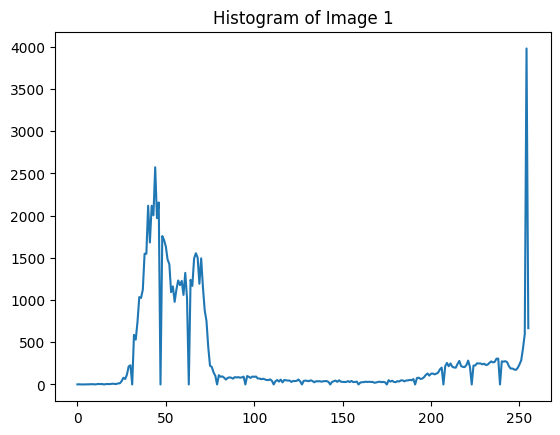

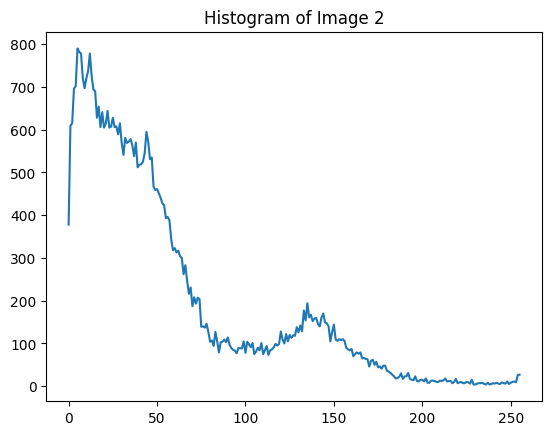

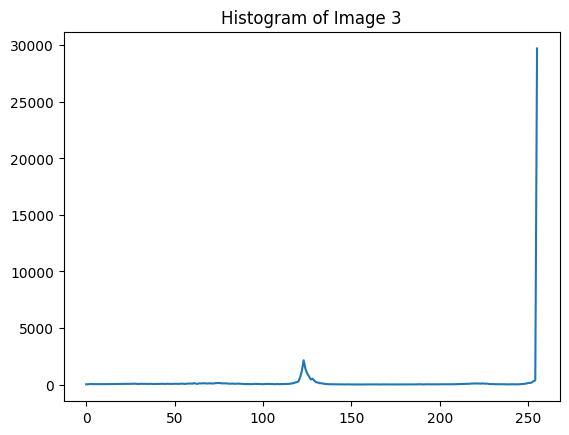

In [9]:
# Plot histogram of grayscale values
for i, g in enumerate(grayscale_images):
    hist = np.histogram(g, bins=256)
    plot(hist[0])
    plt.title(f'Histogram of Image {i+1}')
    plt.show()

C:\Users\Daats\AppData\Local\Temp\ipykernel_10288\3469173677.py:3: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  horizontal_edges = [ndimage.filters.convolve(g, horizontal_kernel) for g in grayscale_images]


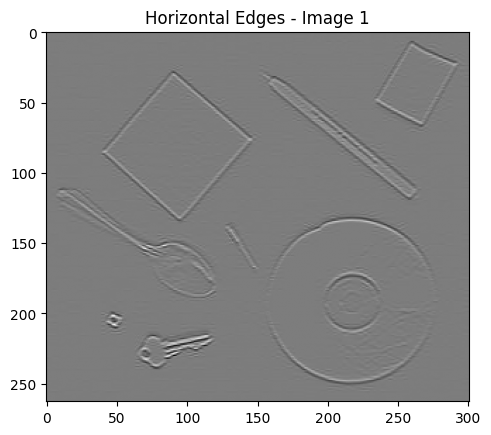

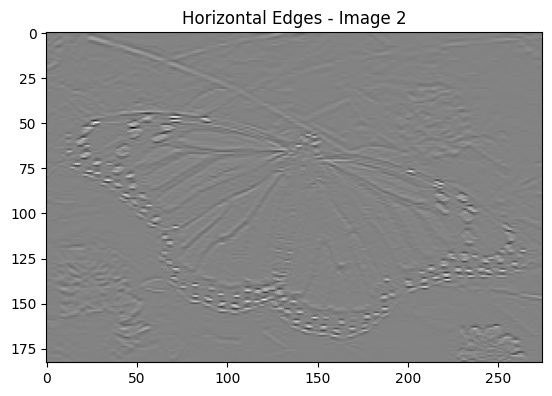

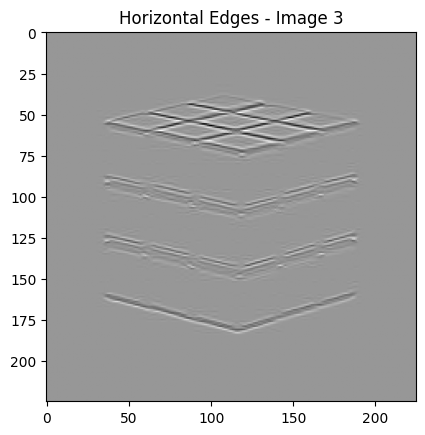

In [10]:
# Apply horizontal edge detection
horizontal_kernel = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
horizontal_edges = [ndimage.filters.convolve(g, horizontal_kernel) for g in grayscale_images]

for i, edge in enumerate(horizontal_edges):
    imshow(edge, cmap='gray')
    plt.title(f'Horizontal Edges - Image {i+1}')
    plt.show()

C:\Users\Daats\AppData\Local\Temp\ipykernel_10288\4283610952.py:3: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  vertical_edges = [ndimage.filters.convolve(g, vertical_kernel) for g in grayscale_images]


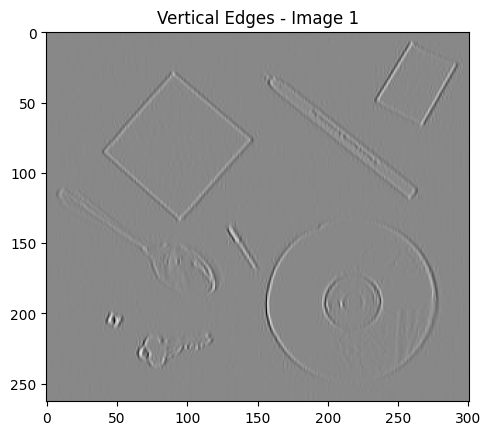

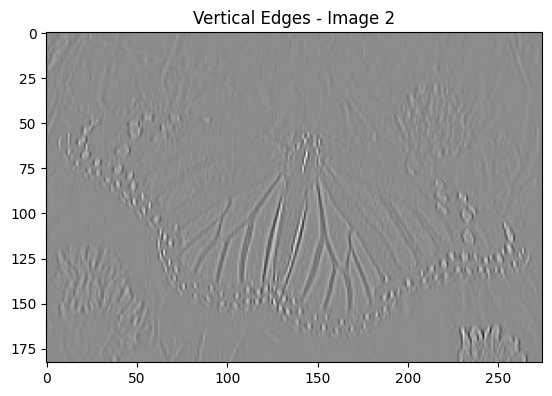

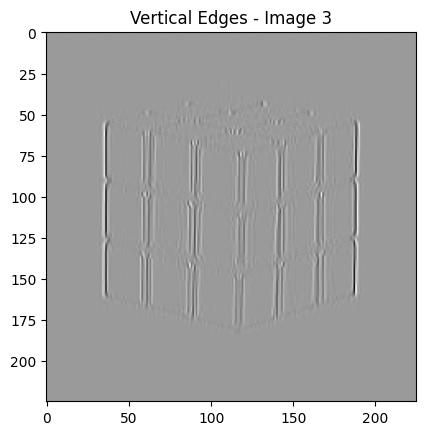

In [11]:
# Apply vertical edge detection
vertical_kernel = np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])
vertical_edges = [ndimage.filters.convolve(g, vertical_kernel) for g in grayscale_images]

for i, edge in enumerate(vertical_edges):
    imshow(edge, cmap='gray')
    plt.title(f'Vertical Edges - Image {i+1}')
    plt.show()